> Import libraries

In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools 
import seaborn as sns

In [2]:
%matplotlib inline

In [13]:
all_thickness_data = pd.read_csv('all_cortical_dfs_2017_07_04.csv')
all_subcortical_data = pd.read_csv('all_subcortical_dfs_2017_07_04.csv')

> # Whole brain volume changes according to age

> ICV, GMV, WMV

In [39]:
ICV_df_sex_gb = all_subcortical_data.groupby('roi').get_group(u'EstimatedTotalIntraCranialVol').groupby('sex')
GMV_df_sex_gb = all_subcortical_data.groupby('roi').get_group(u'TotalGrayVol').groupby('sex')
WMV_df_sex_gb = all_subcortical_data.groupby('roi').get_group(u'CorticalWhiteMatterVol').groupby('sex')

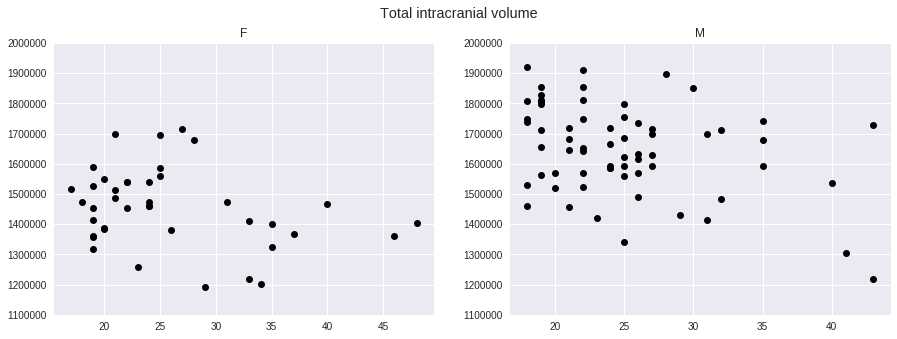

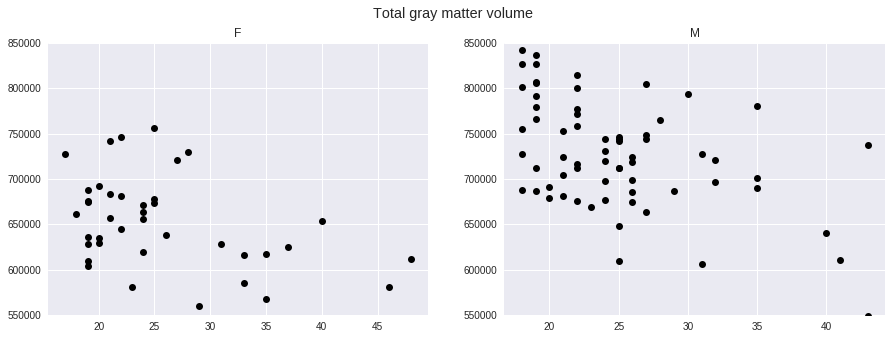

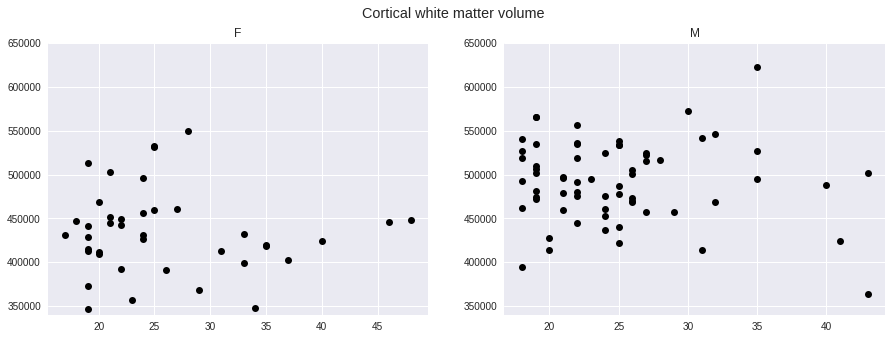

In [63]:
for df, title, ylim in zip([ICV_df_sex_gb, GMV_df_sex_gb, WMV_df_sex_gb],
                           ['Total intracranial volume', 'Total gray matter volume', 'Cortical white matter volume'],
                          [(1100000, 2000000), (550000, 850000), (340000, 650000)]):
    fig, axes = plt.subplots(ncols=2, figsize=(15,5))
    for num, (group, table) in enumerate(df):
        axes[num].plot(table.age, table.volume, 'ko')
        axes[num].set_title(group)
        axes[num].set_ylim(ylim)
    # plt.plot(ICV_df.age, ICV_df.volume, 'ro')
    plt.suptitle(title)
    plt.show()

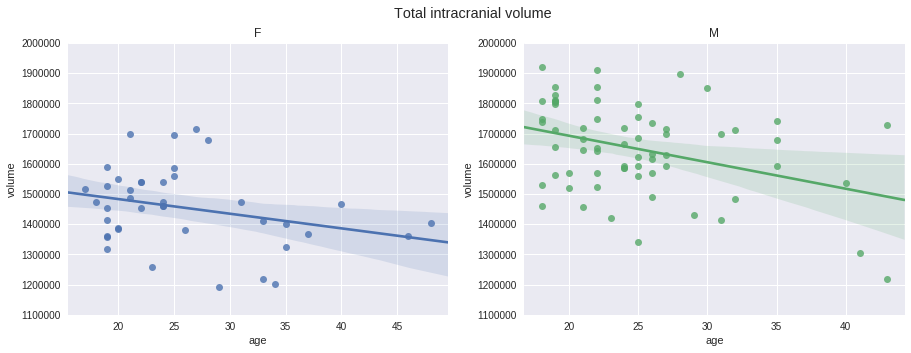

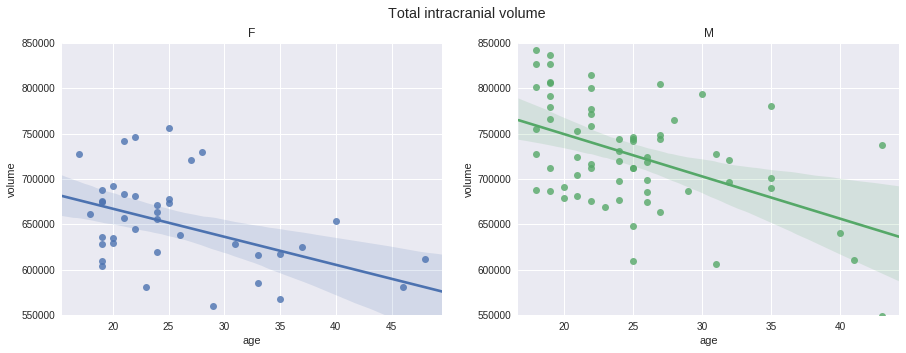

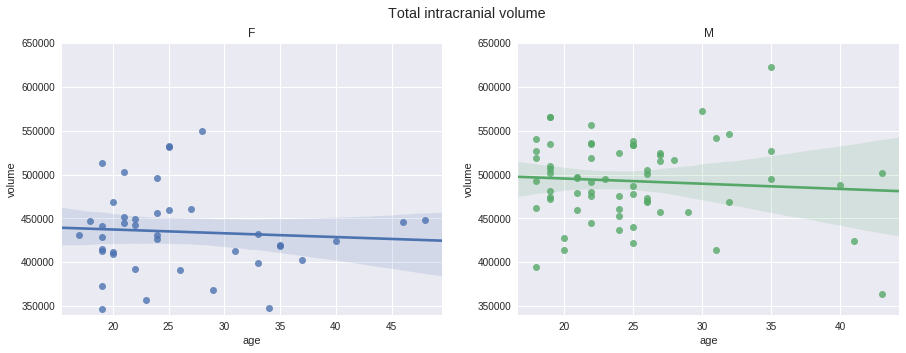

In [61]:
for df, title, ylim in zip([ICV_df_sex_gb, GMV_df_sex_gb, WMV_df_sex_gb],
                           ['Total intracranial volume', 'Total gray matter volume', 'Cortical white matter volume'],
                          [(1100000, 2000000), (550000, 850000), (340000, 650000)]):
    fig, axes = plt.subplots(ncols=2, figsize=(15,5))
    for num, (group, table) in enumerate(df):
        sns.regplot('age', 'volume', 
                    data=table, 
                    ax=axes[num])
        axes[num].set_title(group)
        axes[num].set_ylim(ylim)
    # plt.plot(ICV_df.age, ICV_df.volume, 'ro')
    plt.suptitle('Total intracranial volume')
    plt.show()

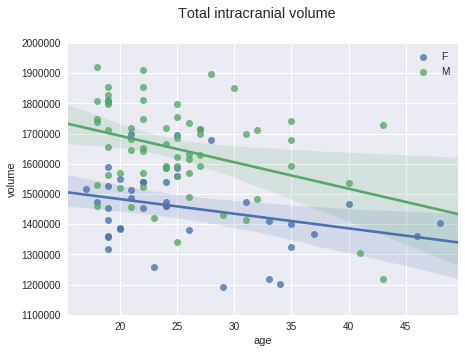

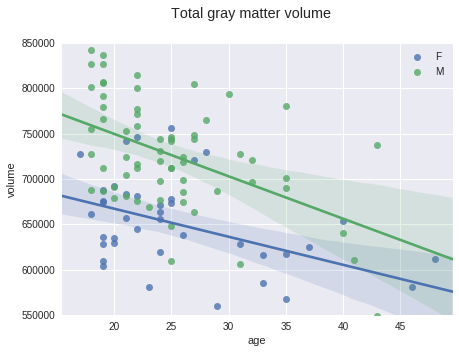

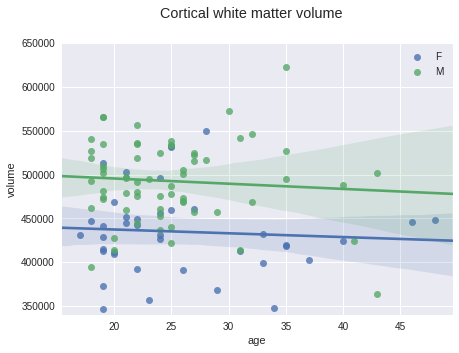

In [62]:
for df, title, ylim in zip([ICV_df_sex_gb, GMV_df_sex_gb, WMV_df_sex_gb],
                           ['Total intracranial volume', 'Total gray matter volume', 'Cortical white matter volume'],
                          [(1100000, 2000000), (550000, 850000), (340000, 650000)]):
    fig, axes = plt.subplots(figsize=(7,5))
    for num, (group, table) in enumerate(df):
        sns.regplot('age', 'volume', 
                    data=table, 
                    ax=axes,
                    label=group)
        axes.set_ylim(ylim)
    plt.legend()
    plt.suptitle(title)
    plt.show()
